# Time- and zonal- mean layer thicknesses and meridional volume transport

This notebook is converted from plt_h_vh.py, which visualizes the time- and zonal-mean layer thicknesses (h) and meridional volume transport (vh) in the density space.

The approach used in v38 keeps both vertical diagnostic coordinates, zstar and rho. The diagnostic variables are h and vh in the density space. 

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

In [2]:
data = nc.Dataset('/short/v45/lxy581/mom6/archive/so_mom6_v38/output028/prog_rho.nc','r')

In [3]:
xq  = data.variables['xq'][:]        # uh
yh  = data.variables['yh'][:]        # uh  ,h
xh  = data.variables['xh'][:]        #   vh,h
yq  = data.variables['yq'][:]        #   vh
rho = data.variables['02_l'][:] 

In [4]:
h4  = data.variables['h'][:,:,:,:]
vh4 = data.variables['vh'][:,:,:,:]
h4  = h4.filled(np.nan)
vh4 = vh4.filled(np.nan)

In [5]:
# time-mean
h3  = np.nanmean(h4,axis=0)
vh3 = np.nanmean(vh4,axis=0)

/apps/python/2.7.6/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:607: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [6]:
# zonal-sum for transport, zonal-mean for layer thicknesses
h2  = np.nanmean(h3,axis=-1)
vh2 = np.nansum(vh3,axis=-1)

/apps/python/2.7.6/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:514: FutureWarning: In Numpy 1.9 the sum along empty slices will be zero.
  FutureWarning)


In [7]:
h2[h2<2.5]=np.nan
vh2[np.isnan(h2)==True]=np.nan

/projects/access/apps/pythonlib/ipython/3.1.0/ipython-3.1.0-py2.7.egg/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


Summing up layer thicknesses, h_sum is an array of total layer thicknesses along y-axis.

In [8]:
%matplotlib inline

(array([   0, 1000, 2000, 3000, 4000, 5000]),
 <a list of 6 Text yticklabel objects>)

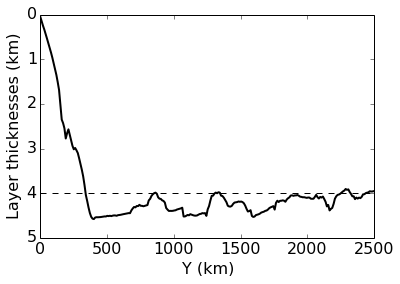

In [9]:
h_sum = np.nansum(h2,axis=0)
# print h_sum
plt.plot(yh,h_sum,linewidth=2.0,color='k')
plt.plot([-1250,1250],[4000,4000],linewidth=1.0,linestyle='--',color='k')
plt.gca().set_xlim([-1250.0,1250.0])
plt.gca().set_xticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_xticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_ylim([0,5000.0])
plt.gca().set_yticks(np.arange(0,5000 + 1000,1000))
plt.gca().set_yticklabels(['0','1','2','3','4','5'])
plt.gca().invert_yaxis()
plt.xlabel('Y (km)',fontsize=16)
plt.ylabel('Layer thicknesses (km)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

Plot layer thicknesses:

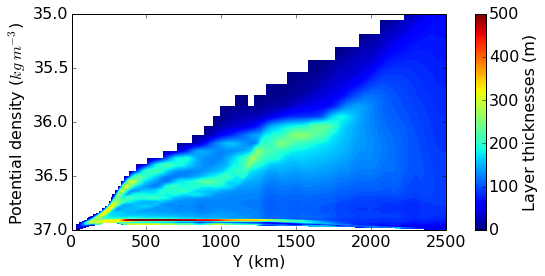

In [10]:
plt.figure(1,figsize=(8,5))

h_level = np.arange(0,500+5,5)
h_ticks = np.arange(0,500+100,100)

pc = plt.contourf(yh,rho,h2,cmap=plt.cm.jet,levels=h_level)
cb = plt.colorbar(pc,ticks=h_ticks)
plt.gca().set_xticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_xticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_ylim([1035.0,1037.0])
plt.gca().set_yticks(np.arange(1035.0,1037.0 + 0.5,0.5))
plt.gca().set_yticklabels(['35.0','35.5','36.0','36.5','37.0'])
plt.gca().invert_yaxis()
plt.gca().set_position([0.15,0.2,0.65,0.6])
cb.ax.set_position([0.85,0.2,0.03,0.6])
cb.set_label('Layer thicknesses (m)',y=0.5,fontsize=16)
cb.ax.tick_params(labelsize=16)
plt.xlabel('Y (km)',fontsize=16)
plt.ylabel('Potential density ($kg\ m^{-3}$)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.savefig('/short/v45/lxy581/mom6/diag/v38_h_rho_y50.png',dpi=600)

plt.show()

Plot volume transport:

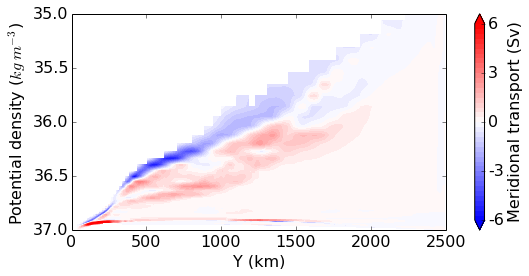

In [11]:
plt.figure(2,figsize=(8,5))

vh_level = np.arange(-6.0e+6,6.0e+6+0.3e+6,0.3e+6)
vh_ticks = np.arange(-6.0e+6,6.0e+6+3e+6,3e+6)

pc = plt.contourf(yq,rho,vh2,cmap=plt.cm.bwr,levels=vh_level,extend='both')
cb = plt.colorbar(pc,ticks=vh_ticks)
plt.gca().set_ylim([1035.0,1037.0])
plt.gca().set_yticks(np.arange(1035.0,1037.0 + 0.5,0.5))
plt.gca().set_yticklabels(['35.0','35.5','36.0','36.5','37.0'])
plt.gca().set_xticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_xticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().invert_yaxis()
plt.gca().set_position([0.15,0.2,0.65,0.6])
cb.ax.set_position([0.85,0.2,0.03,0.6])
cb.ax.set_yticklabels(['-6','-3','0','3','6'])
cb.set_label('Meridional transport (Sv)',y=0.5,fontsize=16)
cb.ax.tick_params(labelsize=16)
plt.xlabel('Y (km)',fontsize=16)
plt.ylabel('Potential density ($kg\ m^{-3}$)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.savefig('/short/v45/lxy581/mom6/diag/v38_vh_rho_y50.png',dpi=600)

plt.show()